In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
%matplotlib inline
from scipy.integrate import odeint
from scipy.integrate import ode
from mpl_toolkits.mplot3d import Axes3D

In [3]:
a=0.1
b=0.1
c=14.
def fun(Y,t):
    return np.array([-Y[1]-Y[2],Y[0]+a*Y[1],b+Y[2]*(Y[0]-c)]) 
times=np.linspace(0,600,50000)
funsol,others=odeint(fun,[1.,0.,1.],times,full_output=True)

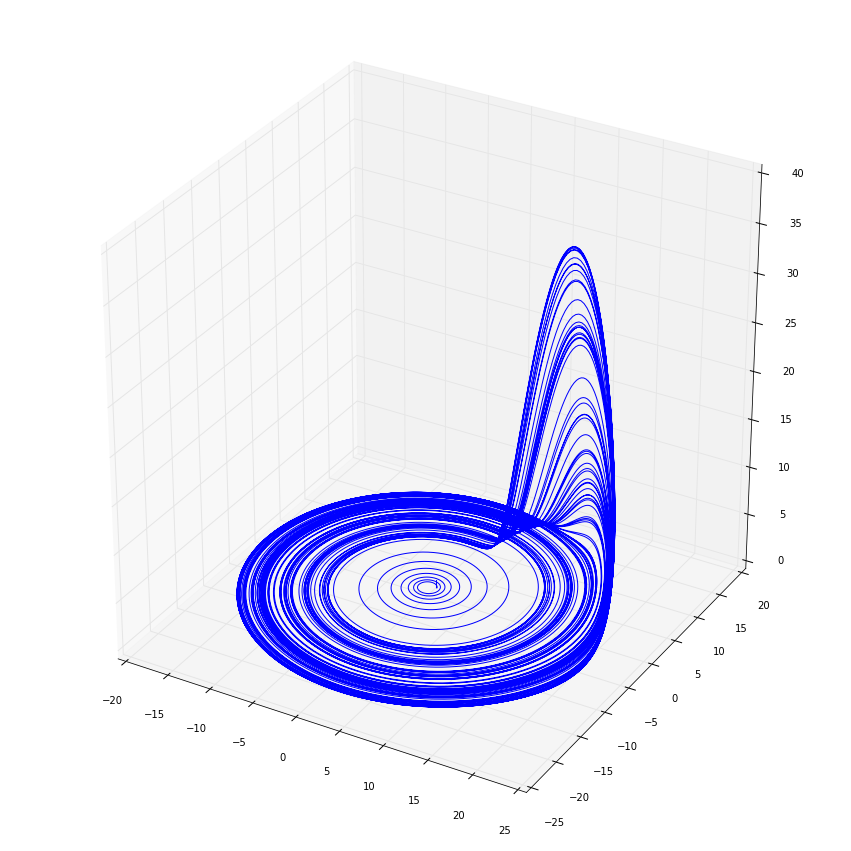

In [4]:
fig = plt.figure(figsize=(15,15))
ax = fig.gca(projection='3d')
ax.plot(funsol[:,0],funsol[:,1],funsol[:,2])
plt.show()

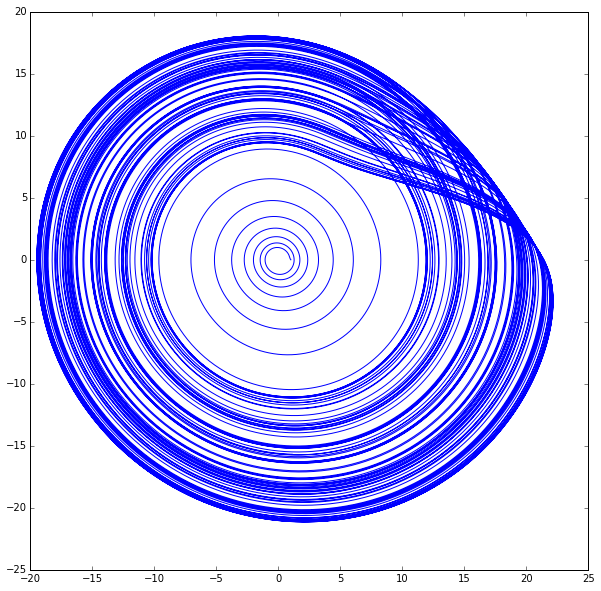

In [5]:
plt.figure(figsize=(10,10))
plt.subplot(1,1,1)
plt.plot(funsol[:,0],funsol[:,1])
plt.show()

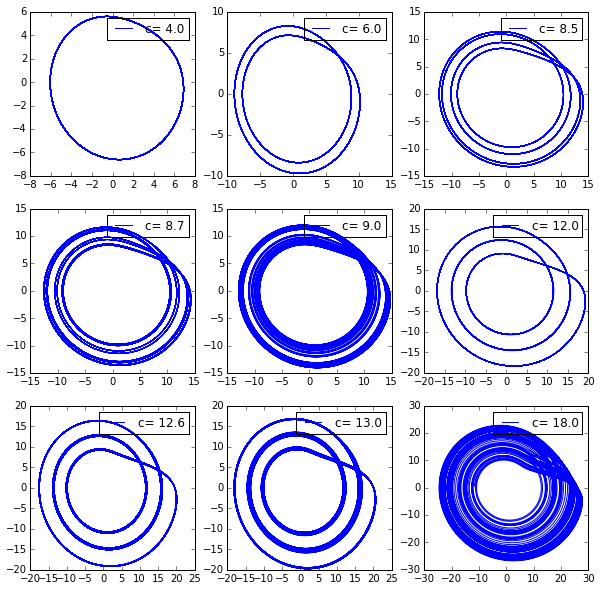

In [6]:
a=0.1
b=0.1
plt.figure(figsize=(10,10))
timesa=np.linspace(0,600,10000)
valorc=[4.,6.,8.5,8.7,9.,12.,12.6,13.,18.]
for i in range(len(valorc)):
    def fun2(Y,t):
        return np.array([-Y[1]-Y[2],Y[0]+a*Y[1],b+Y[2]*(Y[0]-valorc[i])])
    otra,others=odeint(fun2,[1.,1.,1.],timesa,full_output=True)#,printmessg=True)
    funsol2=otra[2000:]
    plt.subplot(3,3,i+1)
    plt.plot(funsol2[:,0],funsol2[:,1],label="c= " + str(valorc[i]))
    plt.legend()
plt.show()

In [7]:
valoresc=np.linspace(1,45,200)
times=np.linspace(0,600,10000)
puntosc=[]
puntosy=[]
for i in range(len(valoresc)):
    def fun2(Y,t):
        return np.array([-Y[1]-Y[2],Y[0]+a*Y[1],b+Y[2]*(Y[0]-valoresc[i])])
    otra,others=odeint(fun2,[1.,1.,1.],times,full_output=True)#,printmessg=True)
    funsol2=otra[2000:]
    x=funsol2[:,0]
    y=funsol2[:,1]
    for j in range(len(x)):
        if(-1<=x[j]<=1 and y[j]>=0):
            puntosc.append(valoresc[i])
            puntosy.append(y[j])

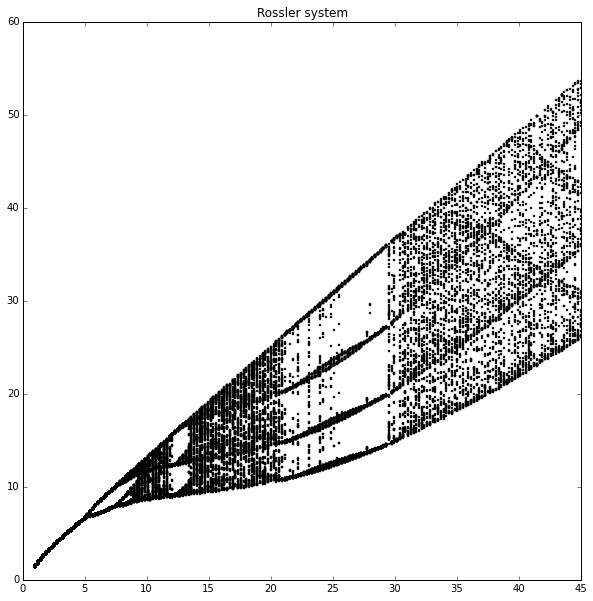

37478


In [8]:
plt.figure(figsize=(10,10))
plt.plot(puntosc,puntosy,"o",color='k', ms=2)
plt.title("Rossler system")
plt.show()
print len(puntosy)

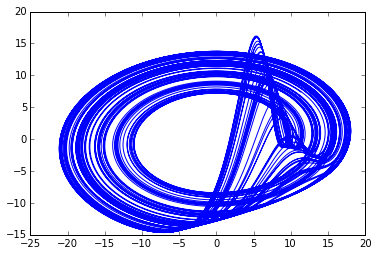

In [12]:
c=14.
def fun(Y,t):
    return np.array([-Y[1]-Y[2],Y[0]+a*Y[1],b+Y[2]*(Y[0]-c)]) 
times=np.linspace(0,600,50000)
otra,others=odeint(fun,[1.,0.,1.],times,full_output=True)
funsol=otra[10000:50000]
theta= 0
v1x= np.array([-np.sin(theta),np.cos(theta),0])
v2y= np.array([-np.cos(np.pi/4)*np.cos(theta),-np.cos(np.pi/4)*np.sin(theta), np.sin(np.pi/4)])
xu=funsol[:,0]
yu=funsol[:,1]
zu=funsol[:,2]
localx=np.zeros(len(xu))
localy=np.zeros(len(xu))
for i in range (len(xu)):
    r= np.array([xu[i],yu[i],zu[i]])
    localx[i]= np.sum (r * v1x)
    localy[i]= np.sum (r * v2y)
plt.plot(localx,localy)

In [46]:
def anima(theta,j):
    c=14.
    def fun(Y,t):
        return np.array([-Y[1]-Y[2],Y[0]+a*Y[1],b+Y[2]*(Y[0]-c)]) 
    times=np.linspace(0,600,50000)
    otra,others=odeint(fun,[1.,0.,1.],times,full_output=True)
    funsol=otra[10000:50000]
    v1x= np.array([-np.sin(theta),np.cos(theta),0])
    v2y= np.array([-np.cos(np.pi/4)*np.cos(theta),-np.cos(np.pi/4)*np.sin(theta), np.sin(np.pi/4)])
    xu=funsol[:,0]
    yu=funsol[:,1]
    zu=funsol[:,2]
    localx=np.zeros(len(xu))
    localy=np.zeros(len(xu))
    for i in range (len(xu)):
        r= np.array([xu[i],yu[i],zu[i]])
        localx[i]= np.sum (r * v1x)
        localy[i]= np.sum (r * v2y)
        if(i==(len(xu)-1)):
            plt.figure(figsize=(8,5))
            plt.plot(localx,localy)
            plt.xlim(-25,25)
            plt.ylim(-15,40)
            plt.axis('off')
            plt.savefig(str(j+100))            

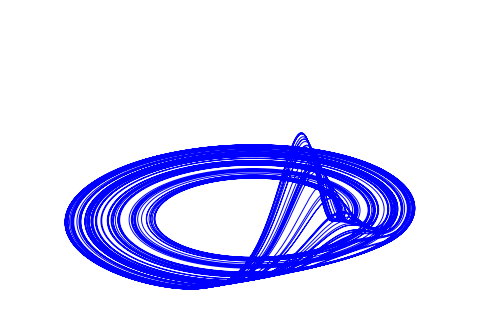

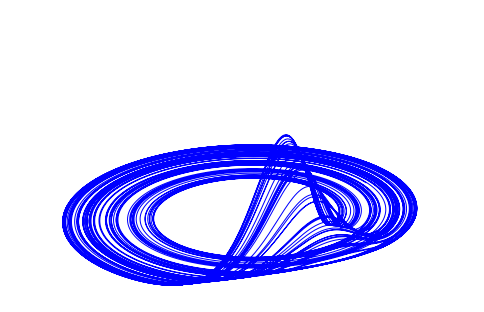

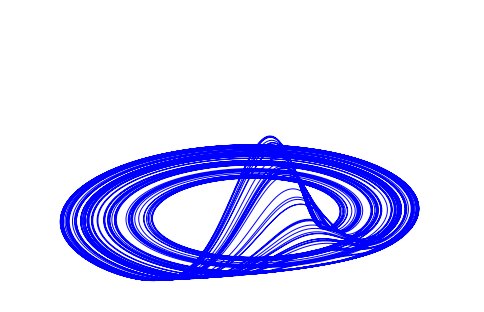

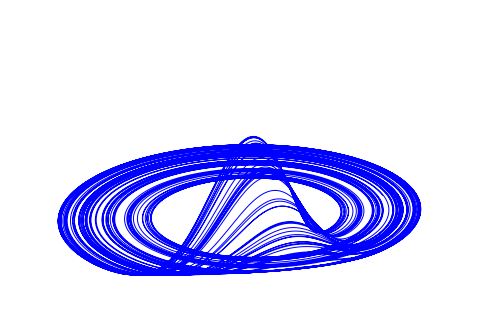

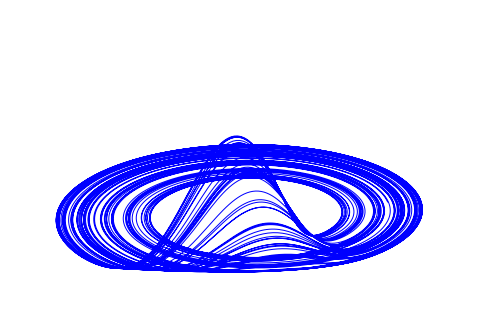

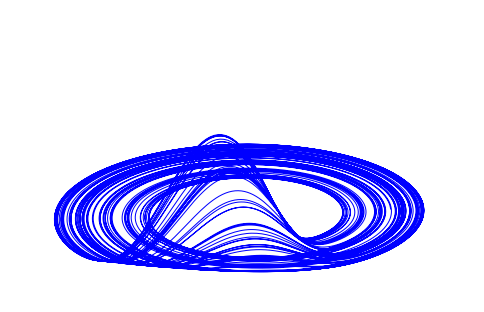

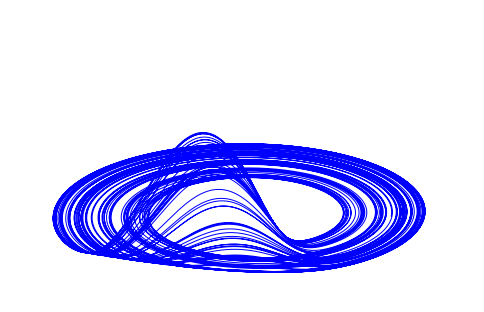

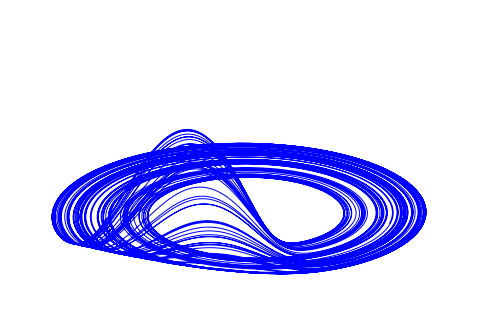

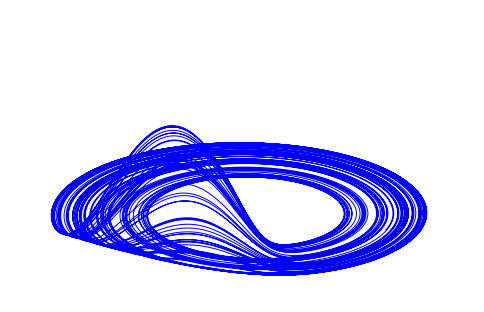

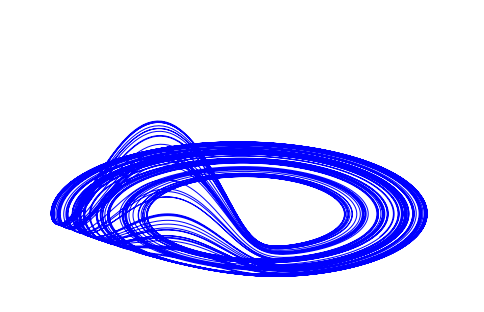

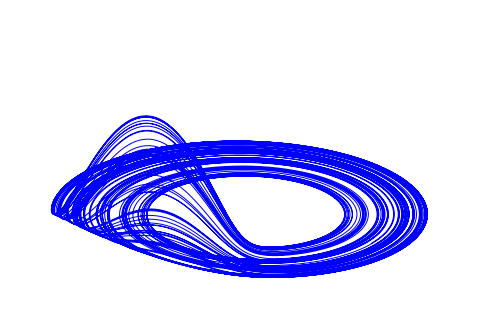

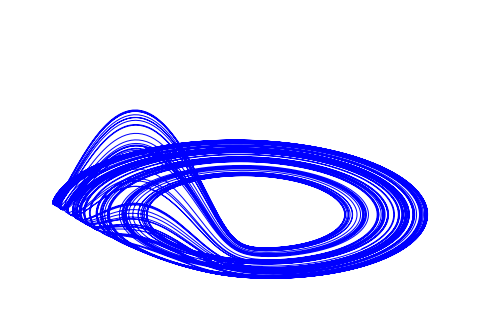

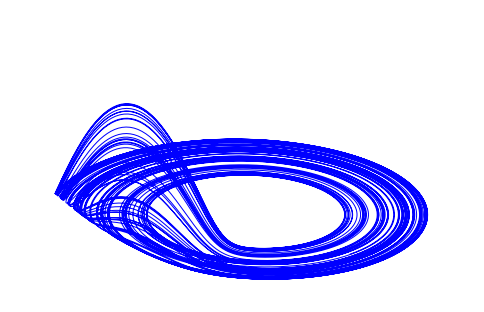

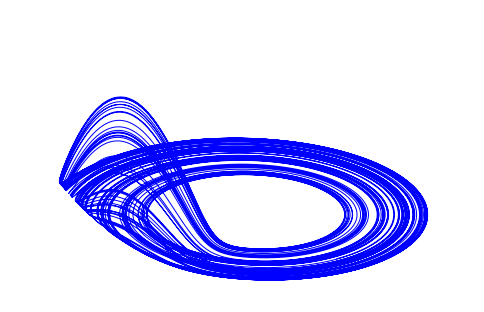

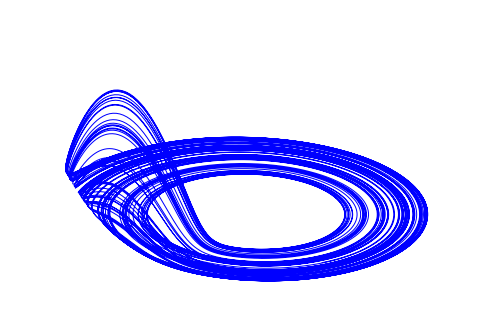

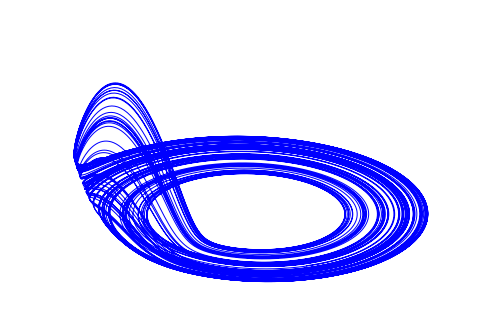

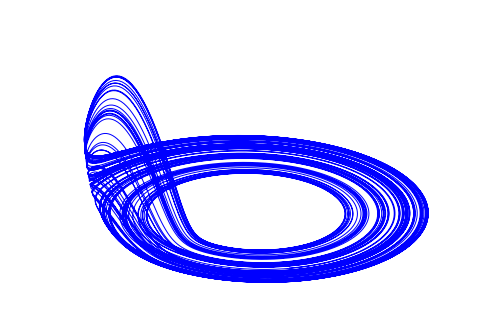

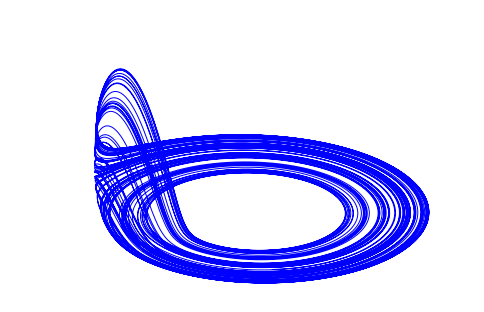

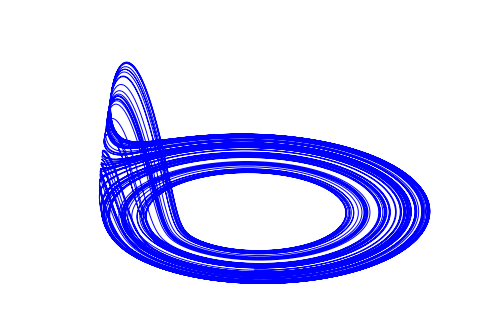

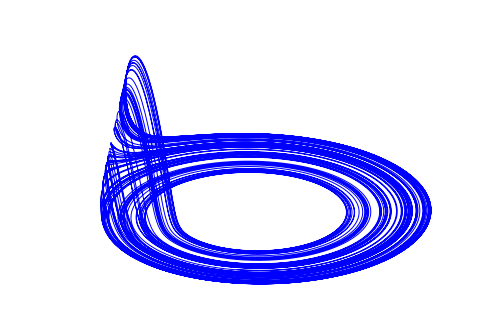

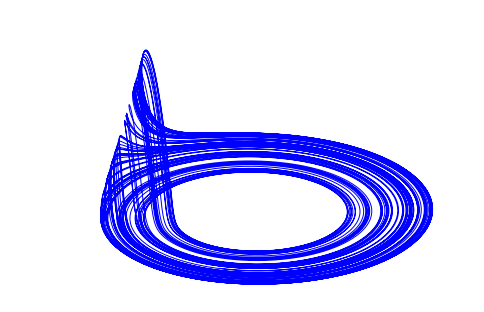

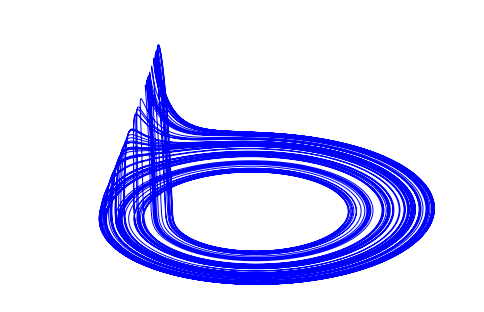

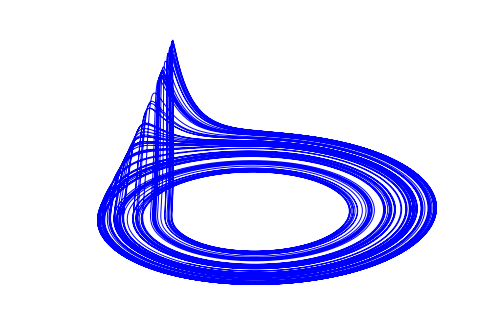

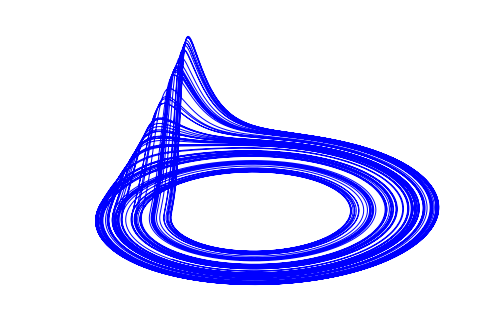

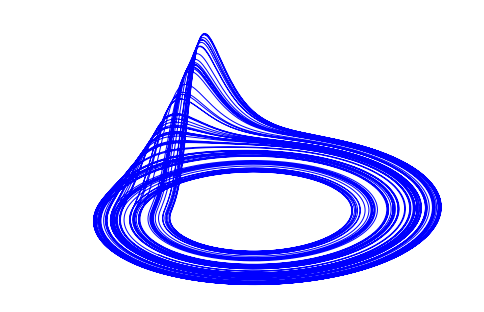

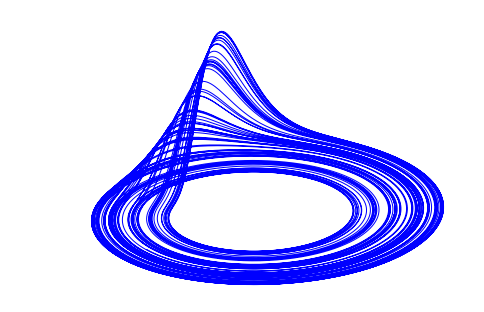

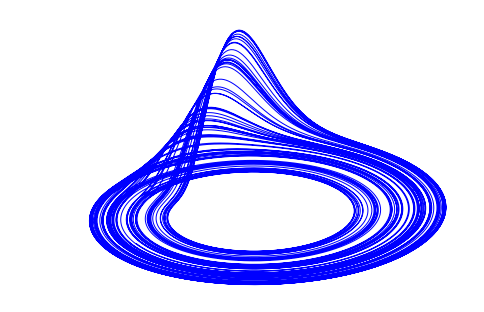

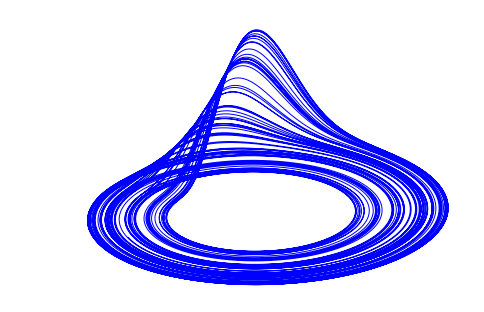

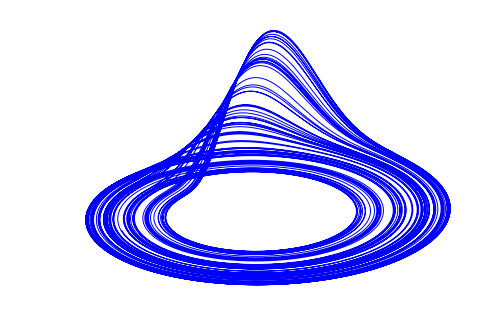

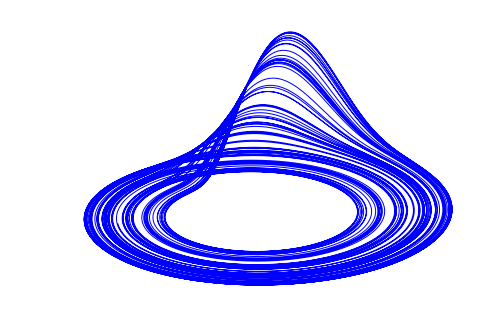

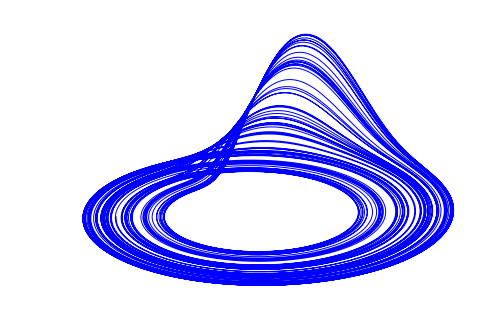

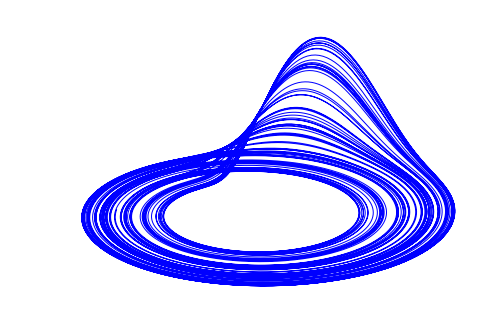

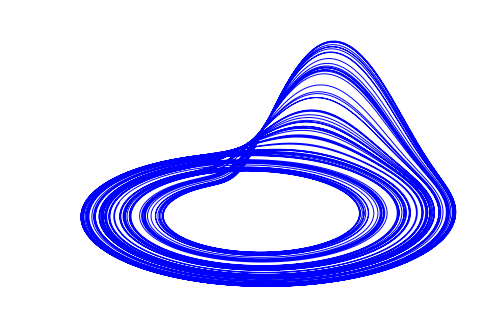

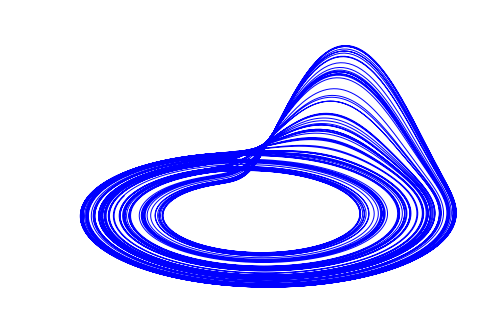

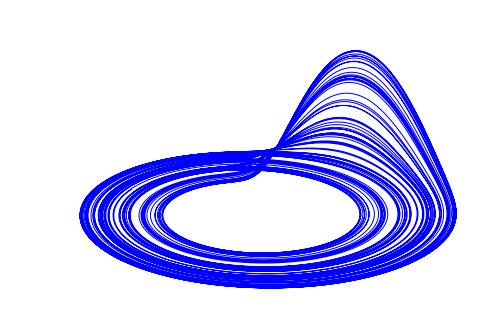

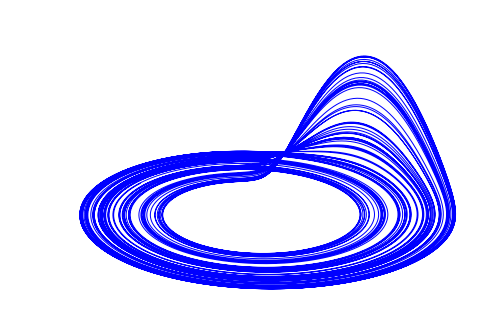

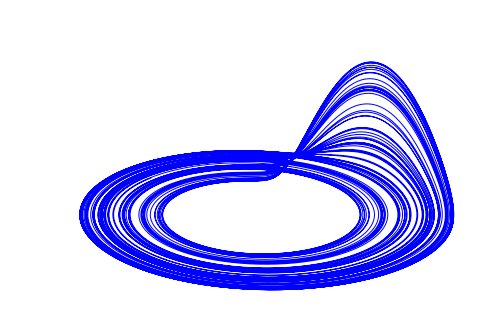

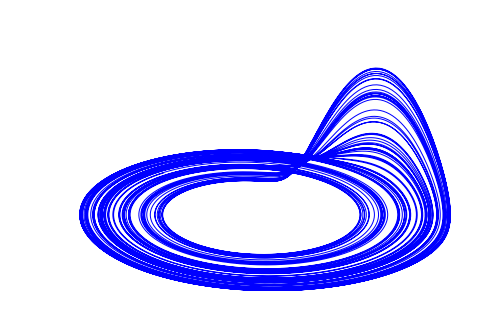

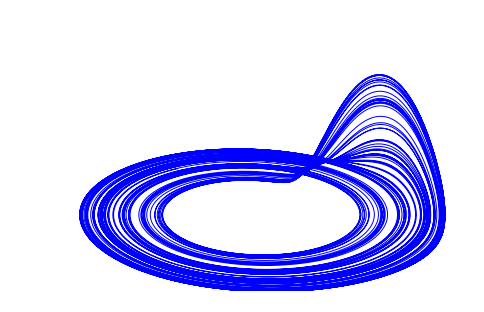

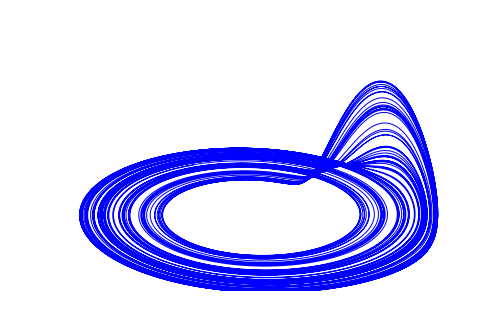

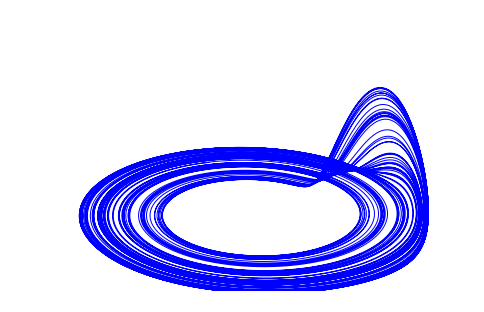

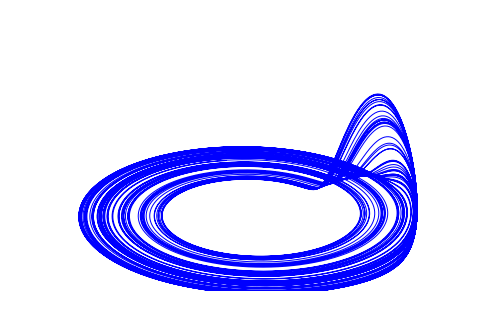

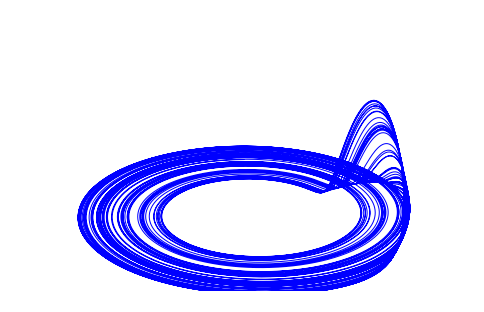

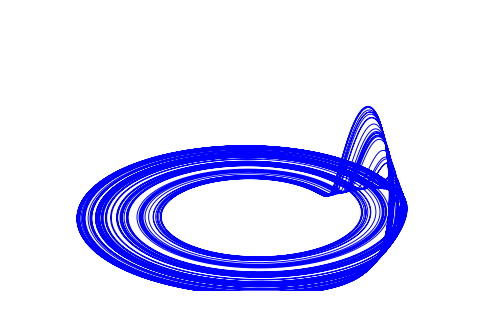

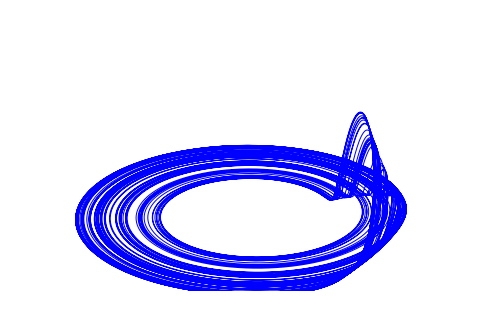

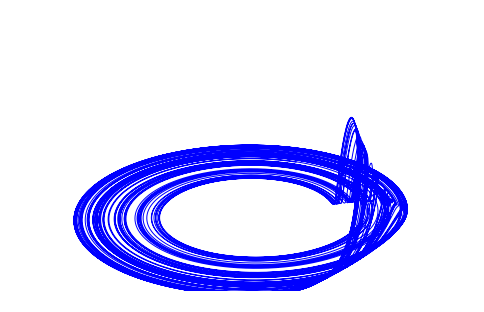

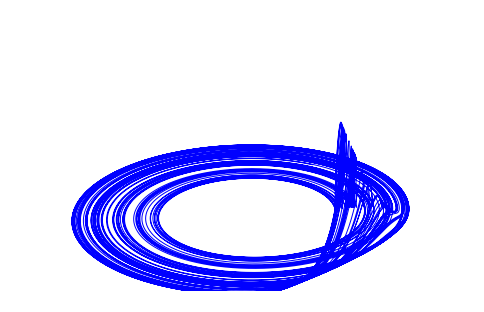

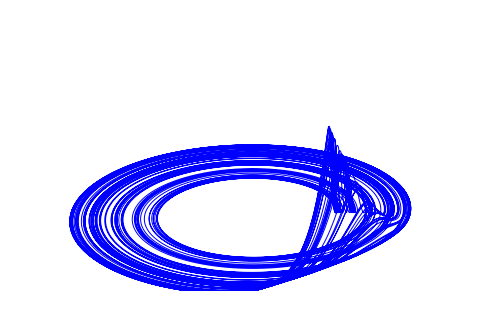

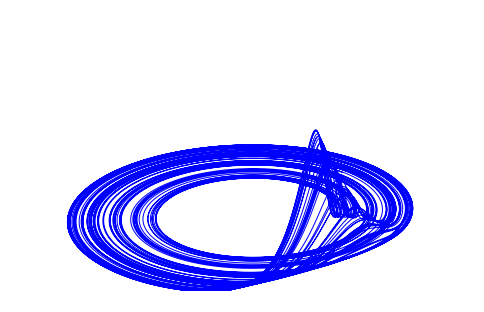

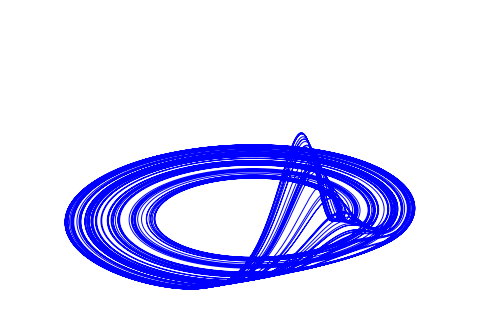

In [47]:
ang=np.linspace(0,2*np.pi,50)
for i in range(len(ang)):
    anima(ang[i],i)
#convert -delay 10 -loop 0 *.png animacion3.gif